In [ ]:
import pandas as pd

df = pd.read_excel("EnergieUebersichtCH-2024.xlsx", sheet_name="Zeitreihen0h15", engine="openpyxl")

In [71]:
df

,Unnamed: 0,Summe endverbrauchte Energie Regelblock Schweiz\nTotal energy consumed by end users in the Swiss controlblock,Summe produzierte Energie Regelblock Schweiz\nTotal energy production Swiss controlblock,Summe verbrauchte Energie Regelblock Schweiz\nTotal energy consumption Swiss controlblock,Netto Ausspeisung aus dem Übertragungsnetz Schweiz\nNet outflow of the Swiss transmission grid,Vertikale Einspeisung ins Übertragungsnetz Schweiz\nGrid feed-in Swiss transmission grid,Positive Sekundär-Regelenergie\nPositive secundary control energy,Negative Sekundär-Regelenergie\nNegative secundary control energy,Positive Tertiär-Regelenergie\nPositive tertiary control energy,Negative Tertiär-Regelenergie\nNegative tertiary control energy,Verbundaustausch CH->AT\nCross Border Exchange CH->AT,Verbundaustausch AT->CH\nCross Border Exchange AT->CH,Verbundaustausch CH->DE\nCross Border Exchange CH->DE,Verbundaustausch DE->CH\nCross Border Exchange DE->CH,Verbundaustausch CH->FR\nCross Border Exchange CH->FR,Verbundaustausch FR->CH\nCross Border Exchange FR->CH,Verbundaustausch CH->IT\nCross Border Exchange CH->IT,Verbundaustausch IT->CH\nCross Border Exchange IT->CH,Transit,Import,Export,Durchschnittliche positive Sekundär-Regelenergie Preise\nAverage positive secondary control energy prices,Durchschnittliche negative Sekundär-Regelenergie Preise\nAverage negative secondary control energy prices,Durchschnittliche positive Tertiär-Regelenergie Preise\nAverage positive tertiary control energy prices,Durchschnittliche negative Tertiär-Regelenergie Preise\nAverage negative tertiary control energy prices,Produktion Kanton AG\nProduction Canton AG,Verbrauch Kanton AG\nConsumption Canton AG,Produktion Kanton FR\nProduction Canton FR,Verbrauch Kanton FR\nConsumption Canton FR,Produktion Kanton GL\nProduction Canton GL,Verbrauch Kanton GL\nConsumption Canton GL,Produktion Kanton GR\nProduction Canton GR,Verbrauch Kanton GR\nConsumption Canton GR,Produktion Kanton LU\nProduction Canton LU,Verbrauch Kanton LU\nConsumption Canton LU,Produktion Kanton NE\nProduction Canton NE,Verbrauch Kanton NE\nConsumption Canton NE,Produktion Kanton SO\nProduction Canton SO,Verbrauch Kanton SO\nConsumption Canton SO,Produktion Kanton SG\nProduction Canton SG,Verbrauch Kanton SG\nConsumption Canton SG,Produktion Kanton TI\nProduction Canton TI,Verbrauch Kanton TI\nConsumption Canton TI,Produktion Kanton TG\nProduction Canton TG,Verbrauch Kanton TG\nConsumption Canton TG,Produktion Kanton VS\nProduction Canton VS,Verbrauch Kanton VS\nConsumption Canton VS,"Produktion Kantone AI, AR\nProduction Cantons AI, AR","Verbrauch Kantone AI, AR\nConsumption Cantons AI, AR","Produktion Kantone BL, BS\nProduction Cantons BL, BS","Verbrauch Kantone BL, BS\nConsumption Cantons BL, BS","Produktion Kantone BE, JU\nProduction Cantons BE, JU","Verbrauch Kantone BE, JU\nConsumption Cantons BE, JU","Produktion Kantone SZ, ZG\nProduction Cantons SZ, ZG","Verbrauch Kantone SZ, ZG\nConsumption Cantons SZ, ZG","Produktion Kantone OW, NW, UR\nProduction Cantons OW, NW, UR","Verbrauch Kantone OW, NW, UR\nConsumption Cantons OW, NW, UR","Produktion Kantone GE, VD\nProduction Cantons GE, VD","Verbrauch Kantone GE, VD\nConsumption Cantons GE, VD","Produktion Kantone SH, ZH\nProduction Cantons SH, ZH","Verbrauch Kantone SH, ZH\nConsumption Cantons SH, ZH",Produktion Kantonsübergreifend\nProduction across Cantons,Verbrauch Kantonsübergreifend\nConsumption across Cantons,Produktion Regelzone CH - Ausländische Gebiete\nProduction control area CH - foreign territories,Verbrauch Regelzone CH - Ausländische Gebiete\nConsumption control area CH - foreign territories
0,Zeitstempel,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,Euro/MWh,Euro/MWh,Euro/MWh,Euro/MWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh
1,01.01.2024 00:15,1443841.995625,1296448.71,1939

In [72]:
# Supprimer la première ligne si elle contient "Zeitstempel"
df = df.iloc[1:].reset_index(drop=True)

# Renommer la première colonne
df.rename(columns={df.columns[0]: "timestamp"}, inplace=True)

# Convertir timestamp
df["timestamp"] = pd.to_datetime(df["timestamp"], dayfirst=True)

In [73]:
# Convertir toutes les colonnes sauf timestamp en float
for col in df.columns:
    if col != "timestamp":
        df[col] = (
            df[col].astype(str)
                   .str.replace(",", "")
                   .str.replace(" ", "")
                   .str.replace("\n", "")
                   .replace("", None)
                   .astype(float)
        )


In [74]:
df.dtypes

timestamp                                                                                                        datetime64[ns]
Summe endverbrauchte Energie Regelblock Schweiz\nTotal energy consumed by end users in the Swiss controlblock           float64
Summe produzierte Energie Regelblock Schweiz\nTotal energy production Swiss controlblock                                float64
Summe verbrauchte Energie Regelblock Schweiz\nTotal energy consumption Swiss controlblock                               float64
Netto Ausspeisung aus dem Übertragungsnetz Schweiz\nNet outflow of the Swiss transmission grid                          float64
                                                                                                                      ...      
Verbrauch Kantone SH, ZH\nConsumption Cantons SH, ZH                                                                    float64
Produktion Kantonsübergreifend\nProduction across Cantons                                               

In [75]:
df = df.rename(columns={
    df.columns[0]: "timestamp",
    "Summe endverbrauchte Energie Regelblock Schweiz\nTotal energy consumed by end users in the Swiss controlblock": "final_energy_consumed",
    "Summe produzierte Energie Regelblock Schweiz\nTotal energy production Swiss controlblock": "total_energy_produced",
    "Summe verbrauchte Energie Regelblock Schweiz\nTotal energy consumption Swiss controlblock": "total_energy_consumed",
    "Netto Ausspeisung aus dem Übertragungsnetz Schweiz\nNet outflow of the Swiss transmission grid": "net_outflow",
    "Vertikale Einspeisung ins Übertragungsnetz Schweiz\nGrid feed-in Swiss transmission grid": "grid_feed_in",
    "Positive Sekundär-Regelenergie\nPositive secundary control energy": "sec_reg_pos",
    "Negative Sekundär-Regelenergie\nNegative secundary control energy": "sec_reg_neg",
    "Positive Tertiär-Regelenergie\nPositive tertiary control energy": "tert_reg_pos",
    "Negative Tertiär-Regelenergie\nNegative tertiary control energy": "tert_reg_neg",
    "Import": "import",
    "Export": "export",

    # Cantons (production & consommation)
    "Produktion Kanton AG\nProduction Canton AG": "AG_prod",
    "Verbrauch Kanton AG\nConsumption Canton AG": "AG_cons",
    "Produktion Kanton FR\nProduction Canton FR": "FR_prod",
    "Verbrauch Kanton FR\nConsumption Canton FR": "FR_cons",
    "Produktion Kanton GL\nProduction Canton GL": "GL_prod",
    "Verbrauch Kanton GL\nConsumption Canton GL": "GL_cons",
    "Produktion Kanton GR\nProduction Canton GR": "GR_prod",
    "Verbrauch Kanton GR\nConsumption Canton GR": "GR_cons",
    "Produktion Kanton LU\nProduction Canton LU": "LU_prod",
    "Verbrauch Kanton LU\nConsumption Canton LU": "LU_cons",
    "Produktion Kanton NE\nProduction Canton NE": "NE_prod",
    "Verbrauch Kanton NE\nConsumption Canton NE": "NE_cons",
    "Produktion Kanton SO\nProduction Canton SO": "SO_prod",
    "Verbrauch Kanton SO\nConsumption Canton SO": "SO_cons",
    "Produktion Kanton SG\nProduction Canton SG": "SG_prod",
    "Verbrauch Kanton SG\nConsumption Canton SG": "SG_cons",
    "Produktion Kanton TI\nProduction Canton TI": "TI_prod",
    "Verbrauch Kanton TI\nConsumption Canton TI": "TI_cons",
    "Produktion Kanton TG\nProduction Canton TG": "TG_prod",
    "Verbrauch Kanton TG\nConsumption Canton TG": "TG_cons",
    "Produktion Kanton VS\nProduction Canton VS": "VS_prod",
    "Verbrauch Kanton VS\nConsumption Canton VS": "VS_cons",
    "Produktion Kantone AI, AR\nProduction Cantons AI, AR": "AI_AR_prod",
    "Verbrauch Kantone AI, AR\nConsumption Cantons AI, AR": "AI_AR_cons",
    "Produktion Kantone BL, BS\nProduction Cantons BL, BS": "BL_BS_prod",
    "Verbrauch Kantone BL, BS\nConsumption Cantons BL, BS": "BL_BS_cons",
    "Produktion Kantone BE, JU\nProduction Cantons BE, JU": "BE_JU_prod",
    "Verbrauch Kantone BE, JU\nConsumption Cantons BE, JU": "BE_JU_cons",
    "Produktion Kantone SZ, ZG\nProduction Cantons SZ, ZG": "SZ_ZG_prod",
    "Verbrauch Kantone SZ, ZG\nConsumption Cantons SZ, ZG": "SZ_ZG_cons",
    "Produktion Kantone OW, NW, UR\nProduction Cantons OW, NW, UR": "OW_NW_UR_prod",
    "Verbrauch Kantone OW, NW, UR\nConsumption Cantons OW, NW, UR": "OW_NW_UR_cons",
    "Produktion Kantone GE, VD\nProduction Cantons GE, VD": "GE_VD_prod",
    "Verbrauch Kantone GE, VD\nConsumption Cantons GE, VD": "GE_VD_cons",
    "Produktion Kantone SH, ZH\nProduction Cantons SH, ZH": "SH_ZH_prod",
    "Verbrauch Kantone SH, ZH\nConsumption Cantons SH, ZH": "SH_ZH_cons",
    "Produktion Kantonsübergreifend\nProduction across Cantons": "multi_prod",
    "Verbrauch Kantonsübergreifend\nConsumption across Cantons": "multi_cons",
    "Produktion Regelzone CH - Ausländische Gebiete\nProduction control area CH - foreign territories": "foreign_prod",
    "Verbrauch Regelzone CH - Ausländische Gebiete\nConsumption control area CH - foreign territories": "foreign_cons"
})


In [76]:
pd.set_option('display.max_columns', None)

In [77]:
df = df.rename(columns={
    "Verbundaustausch CH->AT\nCross Border Exchange CH->AT": "Cross Border Exchange CH->AT",
    "Verbundaustausch AT->CH\nCross Border Exchange AT->CH": "Cross Border Exchange AT->CH",
    "Verbundaustausch CH->DE\nCross Border Exchange CH->DE": "Cross Border Exchange CH->DE",
    "Verbundaustausch DE->CH\nCross Border Exchange DE->CH": "Cross Border Exchange DE->CH",
    "Verbundaustausch CH->FR\nCross Border Exchange CH->FR": "Cross Border Exchange CH->FR",
    "Verbundaustausch FR->CH\nCross Border Exchange FR->CH": "Cross Border Exchange FR->CH",
    "Verbundaustausch CH->IT\nCross Border Exchange CH->IT": "Cross Border Exchange CH->IT",
    "Verbundaustausch IT->CH\nCross Border Exchange IT->CH": "Cross Border Exchange IT->CH",
})

In [80]:
df = df.rename(columns={
    'Durchschnittliche positive Sekundär-Regelenergie Preise\nAverage positive secondary control energy prices': 'Average positive secondary control energy prices',
    'Durchschnittliche negative Sekundär-Regelenergie Preise\nAverage negative secondary control energy prices': 'Average negative secondary control energy prices',
    'Durchschnittliche positive Tertiär-Regelenergie Preise\nAverage positive tertiary control energy prices': 'Average positive tertiary control energy prices',
    'Durchschnittliche negative Tertiär-Regelenergie Preise\nAverage negative tertiary control energy prices': 'Average negative tertiary control energy prices',
})

In [86]:
df

,timestamp,final_energy_consumed,total_energy_produced,total_energy_consumed,net_outflow,grid_feed_in,sec_reg_pos,sec_reg_neg,tert_reg_pos,tert_reg_neg,Cross Border Exchange CH->AT,Cross Border Exchange AT->CH,Cross Border Exchange CH->DE,Cross Border Exchange DE->CH,Cross Border Exchange CH->FR,Cross Border Exchange FR->CH,Cross Border Exchange CH->IT,Cross Border Exchange IT->CH,Transit,import,export,Average positive secondary control energy prices,Average negative secondary control energy prices,Average positive tertiary control energy prices,Average negative tertiary control energy prices,AG_prod,AG_cons,FR_prod,FR_cons,GL_prod,GL_cons,GR_prod,GR_cons,LU_prod,LU_cons,NE_prod,NE_cons,SO_prod,SO_cons,SG_prod,SG_cons,TI_prod,TI_cons,TG_prod,TG_cons,VS_prod,VS_cons,AI_AR_prod,AI_AR_cons,BL_BS_prod,BL_BS_cons,BE_JU_prod,BE_JU_cons,SZ_ZG_prod,SZ_ZG_cons,OW_NW_UR_prod,OW_NW_UR_cons,GE_VD_prod,GE_VD_cons,SH_ZH_prod,SH_ZH_cons,multi_prod,multi_cons,foreign_prod,foreign_cons
0,2024-01-01 00:15:00,1.443842e+06,1296448.710,1.939192e+06,604676.573540,854345.392,25.0,-3860.0,37500.0,0.0,48100.0,80575.0,57996.0,522180.0,84932.0,412292.0,254431.0,73970.0,445459.0,1089017.0,445459.0,38.70,-10.21,57.67,0.0,512107.929,123604.190,17113.001,72020.246,8832.946,143826.721,69188.509,98282.488,9554.883,88883.557,580.311,12971.249,271084.581,35527.911,13250.7236,103439.5498,28545.575,81903.750,4424.730,43279.547,49175.695,191438.880,1431.6354,13236.6452,31321.657,77064.930,76137.629,246064.589,6209.724,50537.468,10894.643,27995.643,41352.810,229333.429,22468.380,251422.561,119689.268,36427.033460,3084.080,11931.964
1,2024-01-01 00:30:00,1.442366e+06,1294126.969,1.921878e+06,592319.128547,852382.105,252.0,-1382.0,37500.0,0.0,42000.0,85479.0,55800.0,491811.0,78828.0,404015.0,250664.0,74193.0,427292.0,1055498.0,427292.0,38.80,8.32,57.67,0.0,512528.372,122947.461,17033.774,73027.768,8810.179,142278.996,71754.822,98425.798,9480.929,90549.587,565.699,12885.877,270882.056,35604.314,13395.9944,97289.4734,26840.557,80570.032,4339.045,43279.963,46248.567,187292.507,1428.5566,13178.8746,31391.130,77267.468,75709.967,247149.214,6022.193,50674.625,10760.790,27521.791,41058.415,224283.806,22550.210,252227.424,120907.426,33431.673453,2418.287,11990.990
2,2024-01-01 00:45:00,1.432568e+06,1289417.659,1.914425e+06,590134.979637,854552.292,160.0,-3759.0,37500.0,0.0,50700.0,74048.0,58800.0,497543.0,62620.0,422245.0,260407.0,64667.0,432527.0,1058503.0,432527.0,38.76,-8.72,57.67,0.0,512291.729,122272.960,17201.347,70715.842,8805.004,142513.934,69439.189,98006.784,9030.250,90922.114,677.796,12609.427,271101.608,36639.189,13263.3256,96601.5422,24831.020,79967.659,4314.319,43003.755,47199.655,190062.300,1427.4624,12871.1388,31371.022,76798.560,75103.841,248060.711,6056.577,50357.291,11102.976,27440.977,40457.555,222318.856,22291.411,248822.329,120503.211,32682.266363,2948.361,11757.277
3,2024-01-01 01:00:00,1.420472e+06,1284384.421,1.917196e+06,594518.189287,855755.833,0.0,-7382.0,37500.0,0.0,51500.0,87188.0,53000.0,521505.0,47353.0,447775.0,316297.0,45235.0,468150.0,1101703.0,468150.0,0.00,-11.27,57.67,0.0,512627.430,121759.453,17258.944,68799.179,8859.578,145439.539,65845.379,97460.651,8798.429,91623.342,737.296,12491.521,270864.963,35651.011,13159.7012,95948.5714,23986.418,79572.943,4392.776,42464.031,47315.718,199545.105,1422.8148,12473.9046,31490.098,76235.841,69987.605,246355.257,5779.711,49783.696,14573.546,26529.546,39970.835,219582.402,22366.316,247489.263,121617.803,36437.505713,3329.060,11553.676
4,2024-01-01 01:15:00,1.445856e+06,1291409.092,1.970522e+06,642303.570950,845762.397,3550.0,-193.0,35000.0,0.0,49300.0,95160.0,50500.0,533221.0,32264.0,464569.0,325411.0,44319.0,457475.0,1137269.0,457475.0,41.79,-0.93,56.79,0.0,512407.876,122357.044,19354.156,79622.400,8767.747,147395.627,48059.727,94538.271,8255.633,93359.618,666.590,12279.648,270792.509,36875.021,13124.6994,97609.6842,27967.083,80669.237,4420.346,42653.617,61024.407,214166.889,1419.5906,13029.5278,315

In [83]:
df.dtypes

timestamp                datetime64[ns]
final_energy_consumed           float64
total_energy_produced           float64
total_energy_consumed           float64
net_outflow                     float64
                              ...      
SH_ZH_cons                      float64
multi_prod                      float64
multi_cons                      float64
foreign_prod                    float64
foreign_cons                    float64
Length: 65, dtype: object

In [87]:
# Colonnes cantonales
prod_cols = [col for col in df.columns if col.endswith("_prod")]
cons_cols = [col for col in df.columns if col.endswith("_cons")]

# Vérifier
print(f"{len(prod_cols)} colonnes de production : {prod_cols[:5]}")
print(f"{len(cons_cols)} colonnes de consommation : {cons_cols[:5]}")


20 colonnes de production : ['AG_prod', 'FR_prod', 'GL_prod', 'GR_prod', 'LU_prod']
20 colonnes de consommation : ['AG_cons', 'FR_cons', 'GL_cons', 'GR_cons', 'LU_cons']


In [89]:
# Total annuel (en GWh)
prod_cantons = df[prod_cols].sum() / 1_000_000
cons_cantons = df[cons_cols].sum() / 1_000_000

# Harmoniser les noms (enlever les suffixes pour affichage)
prod_cantons.index = [col.replace("_prod", "") for col in prod_cantons.index]
cons_cantons.index = [col.replace("_cons", "") for col in cons_cantons.index]



In [90]:
# Balance = production - consommation
balance_cantons = prod_cantons - cons_cantons
balance_sorted = balance_cantons.sort_values()


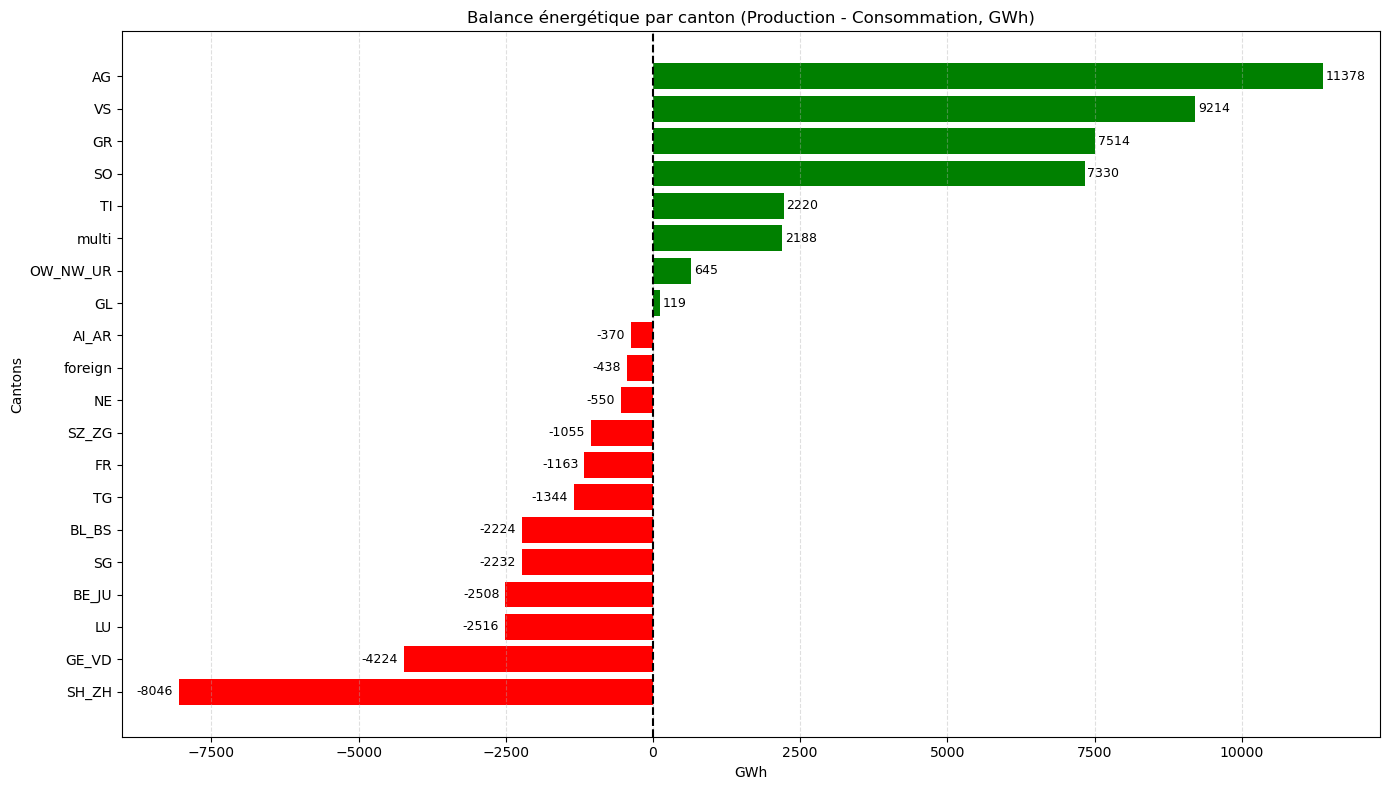

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
bars = plt.barh(balance_sorted.index, balance_sorted.values,
                color=["green" if val >= 0 else "red" for val in balance_sorted.values])

plt.axvline(0, color='black', linestyle='--')

# Ajouter les valeurs sur les barres
for bar in bars:
    plt.text(bar.get_width() + (50 if bar.get_width() > 0 else -100),
             bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.0f}",
             va='center',
             ha='left' if bar.get_width() > 0 else 'right',
             fontsize=9)

plt.title("Balance énergétique par canton (Production - Consommation, GWh)")
plt.xlabel("GWh")
plt.ylabel("Cantons")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [95]:
autonomie_cantons = (prod_cantons / cons_cantons) * 100
autonomie_cantons = autonomie_cantons.sort_values(ascending=False)

# Affichage top et flop
print("🔝 Cantons les plus autonomes :\n", autonomie_cantons.head(5))
print("🔻 Cantons les moins autonomes :\n", autonomie_cantons.tail(5))


🔝 Cantons les plus autonomes :
 SO       697.012098
GR       430.848102
AG       343.064083
VS       305.386357
multi    226.622232
dtype: float64
🔻 Cantons les moins autonomes :
 AI_AR    25.072442
LU       21.730922
TG       20.517640
SH_ZH    12.094014
NE        7.073255
dtype: float64


In [98]:
df.to_csv("energie_suisse_2024.csv", index=False)

In [99]:
df.to_excel("energie_suisse_2024.xlsx", index=False, engine="openpyxl")

In [101]:
# Make sure timestamp is parsed
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Clean numeric columns (just in case)
df['total_energy_produced'] = pd.to_numeric(df['total_energy_produced'], errors='coerce')
df['total_energy_consumed'] = pd.to_numeric(df['total_energy_consumed'], errors='coerce')

# Sum of energy (in GWh)
total_produced = df['total_energy_produced'].sum() / 1_000_000_000
total_consumed = df['total_energy_consumed'].sum() / 1_000_000_000
balance = total_produced - total_consumed

print(f"✅ Total Energy Produced: {total_produced:.2f} GWh")
print(f"✅ Total Energy Consumed: {total_consumed:.2f} GWh")
print(f"⚖️ Net Balance: {balance:.2f} GWh")


✅ Total Energy Produced: 75.57 GWh
✅ Total Energy Consumed: 61.63 GWh
⚖️ Net Balance: 13.94 GWh
